# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Решение***

$$L(w) =  \frac{1}{N}\left[\sum_{i=1}^{N} (a_i - y_i) ^ 2 \right] + \frac{1}{C} \sum_{j=1}^{D}w_j^2 $$

$$a_i = a(x_i) =  \langle\,x_i,w\rangle$$

$$L(w) =  \frac{1}{N}\left[\sum_{i=1}^{N} (\langle\,x_i,w\rangle - y_i) ^ 2 \right] + \frac{1}{C} \sum_{j=1}^{D}w_j^2 $$

$$L(w) =  \frac{1}{N}(\langle\,X,w\rangle - y)^{T}(\langle\,X,w\rangle - y) + \frac{1}{C} w^{T}w $$

$$ \nabla_w{L(w)}  = \frac{ \nabla_w }{N}(w^{T}X^{T}X w - y^{T}X w - w^{T}X^{T}y + y^{T}y) + \frac{2}{C} w$$

$$ \nabla_w{L(w)}  = \frac{2X^{T}X w - 2X^{T}y }{N}  + \frac{2}{C} w$$

$$ w_{new} = w_{old} - \alpha\nabla_w{L(w_{old})} $$

$$ w_{new} = w_{old} - \alpha\left( \frac{2X^{T}(X w_{old} - y)}{N} + \frac{2}{C} w_{old}\right) $$

*Для мини-батч размера n:*

$$ w_{new} = w_{old}\left (1 -  \frac{2\alpha}{C}\right) -\frac{2 \alpha X^{T}(X w_{old} - y)}{n}$$
*X - матрица признаков с n строками*

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Решение***

$$L(w) =  - \frac{1}{N}\left[\sum_i^N y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] + \frac{1}{C} \sum_{j=1}^{D}w_j^2 $$

$$a_i = a(x_i) =  \frac{1}{1 + \exp(-\langle\,x_i,w\rangle)}$$

$$ \nabla_w{L(w)}=-\frac{1}{N}\left[\sum_i^{N} \frac{y_i}{a_i}\frac{\partial a_i }{\partial w}-\frac{1-y_i}{1-a_i}\frac{\partial a_i }{\partial w}\right] +\frac{2}{C}w $$

$$ \nabla_w{L(w)}=\frac{1}{N}\left[\sum_i^{N} (y_i - a_i)X_{i}^{T}\right] +\frac{2}{C}w $$

$$ w_{new} = w_{old} - \alpha\nabla_w{L(w_{old})} $$

*Для мини-батч размера n:*

$$ \forall j_1, ..., j_n  $$

$$ w_{new}  = w_{old} - \alpha\left[\frac{1}{n}\sum_{i=1}^{n}(y_{j_i} - a_{j_i})X_{j_i}^{T} + \frac{2}{C}w_{old} \right]$$
*$X_{j_i}$ - $j_i$-я строка  матрицы признаков*

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Решение***

$$ \nabla_w^2{L(w)}  = \frac{2X^{T}X}{N}$$

*так как для ненулевого z и полной матрицы X*
$$z^{T}(X^{T}X)z = (Xz)^{T}(Xz) = ||Xz||^{2} > 0$$
Поэтому Гессиан положительно определён.

Точное решение с регуляризацией:
$$ \nabla_w{L(w)}  = \frac{2X^{T}X w - 2X^{T}y }{N}  + \frac{2}{C}w = 0$$

$$ w  = \frac{X^{T}y}{X^{T}X + \frac{N}{C}I} $$

*Если матрица X имеет ЛЗ признаки, то*
$$X^{T}X $$
*не имеет обратной. С регуляризацией можно подобрать С так, что обратная матрица будет существовать.*

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Решение***

$$\frac{\partial E(L | x_i)}{\partial a} = -\frac{p(y_i = 1 |x_i )}{a(x_i)}  +\frac {p(y_i = 0 | x_i)} { 1 - a(x_i)} = 0$$

$$a(x_i) = p(y_i = 1 |x_i )$$

$$\frac{\partial^2 E(L | x_i)}{\partial a^2} = \frac{p(y_i = 1 |x_i )}{a(x_i)^2}  +\frac {p(y_i = 0 | x_i)} {( 1 - a(x_i))^2} > 0$$

Задача 5.  Смысл регуляризации.
Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Решение***

***Нет.***
Мы вводим регуляризацию для борьбы с переобучением. Если вес $w_i$ будет очень большим, то при малых изменениях $x_i$ выход будет сильно меняться. Поэтому имеет смысл значения весов ограничивать.
Член $w_0$ вводится, чтобы не выписывать отдельно свободное слагаемое (сдвиг). Он показывает, что выдаёт модель при обнулении всех признаков. На переобучение никак не влияет, потому что у всех $x$ присутствует (не входит в те самые "малые изменения" :) ). Возможно, что пытаться регуляризовать его со всеми - плохая идея.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [4]:
from sklearn.utils import shuffle as shffl

In [3]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if shuffle:
        X, y = shffl(X, y, random_state=0)
    for i in range(X.shape[0] // batch_size):
        X_batch = X[i * batch_size : (i+1) * batch_size, :]
        y_batch = y[i * batch_size : (i+1) * batch_size]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
# my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [1]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    x = np.clip(x, -10, 10) # чтобы 1 не получалась на выходе
    sigm_value_x = 1./(1. + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10,
                 model_type='lin_reg', penalty='l2', batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
        self.penalty = penalty
        self.batch_size = batch_size
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.penalty == 'l2':
            R = np.dot(self.weights[1:], self.weights[1:])
            R = R / self.C
        elif self.penalty == 'l1':
            R = np.sum(list(map(abs, self.weights[1:])))
            R = R / self.C
        else:
            R = 0
        
        if self.model_type == 'lin_reg':
            pred = np.dot(X_batch, self.weights) - y_batch
            loss = np.dot(pred, pred)
            
        else:
            pred = np.dot(X_batch, self.weights)
            a = sigmoid(pred) # [a1,a2,..,an]
            a = np.clip(a, 1e-15, 1 - 1e-15)
            loss = - np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a))
            
        loss = loss / X_batch.shape[0] + R
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        if self.penalty == 'l2':
            R = 2. * self.weights[1:] # [2w1,1w2,...,2wd]
            R = np.hstack(([0], R)) #[0, 2w1, ..., 2wd]
            R = R / self.C
        elif self.penalty == 'l1':
            R = nphstack(([0], np.ones(self.weights.shape[0] - 1))) # [0,1,...1]
            R = R / self.C
        else:
            R = np.zeros(self.weights.shape[0])
        
        if self.model_type == 'lin_reg':
            loss_grad = np.dot(X_batch, self.weights) - y_batch
            loss_grad = 2 * np.dot(X_batch.T, loss_grad)
            
        else:
            pred = np.dot(X_batch, self.weights)
            a = sigmoid(pred) # [a1, a2, ... , an]
            loss_grad = np.dot(X_batch.T, a - y_batch)
        
        loss_grad = loss_grad / X_batch.shape[0] + R
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # вставляем фиктивный столбец
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        # Нужно инициализровать случайно веса
        self.weights = np.random.randn(X.shape[1]).astype(np.longdouble) 
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y,
                                                       batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        y_hat = np.dot(X, self.weights)
        if self.model_type == 'log_reg':
            y_hat = sigmoid(y_hat)
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [5]:
def plot_decision_boundary(clf):
    w = clf.weights
    print('weights: ', w)
    x = np.array([-5., 8.])
    y = - (x * w[1] + w[0]) / w[2]
    return x, y

weights:  [ 0.07260068  0.15705407 -0.09381778]


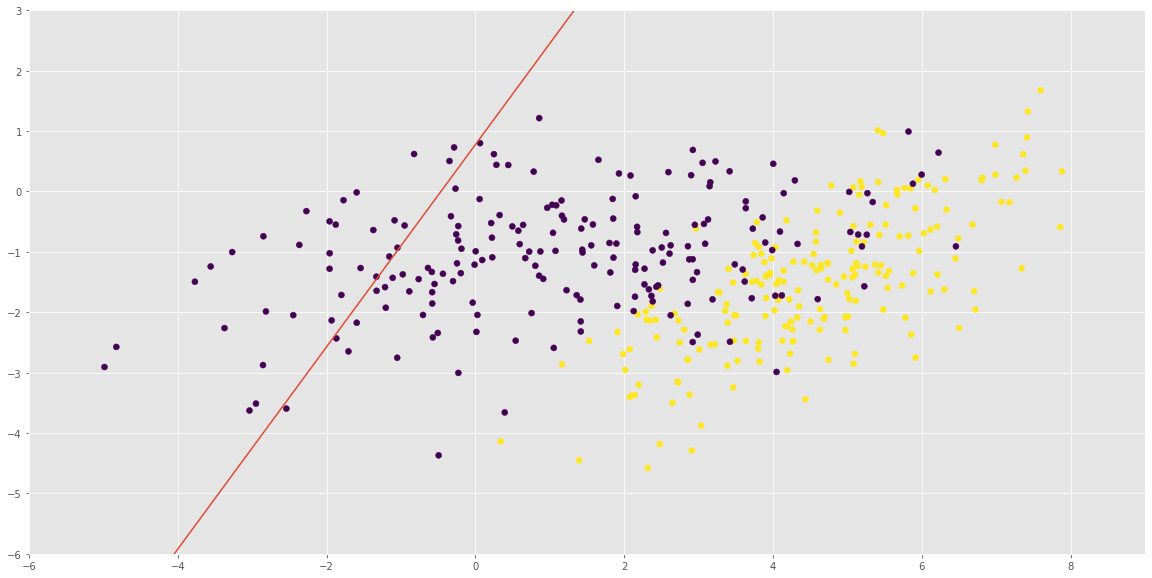

In [6]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

# X[:, 0].min(), X[:, 0].max()
# X[:, 1].min(), X[:, 1].max()

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.scatter(X[:,0], X[:,1], c=y)

clf = MySGDClassifier(batch_generator, model_type='lin_reg')
clf.fit(X, y)
x_, y_ = plot_decision_boundary(clf)

ax.plot(x_, y_)
ax.set_xlim(-6., 9.)
ax.set_ylim(-6., 3.)
plt.show()

weights:  [-0.76115769  0.27482181 -0.07179158]


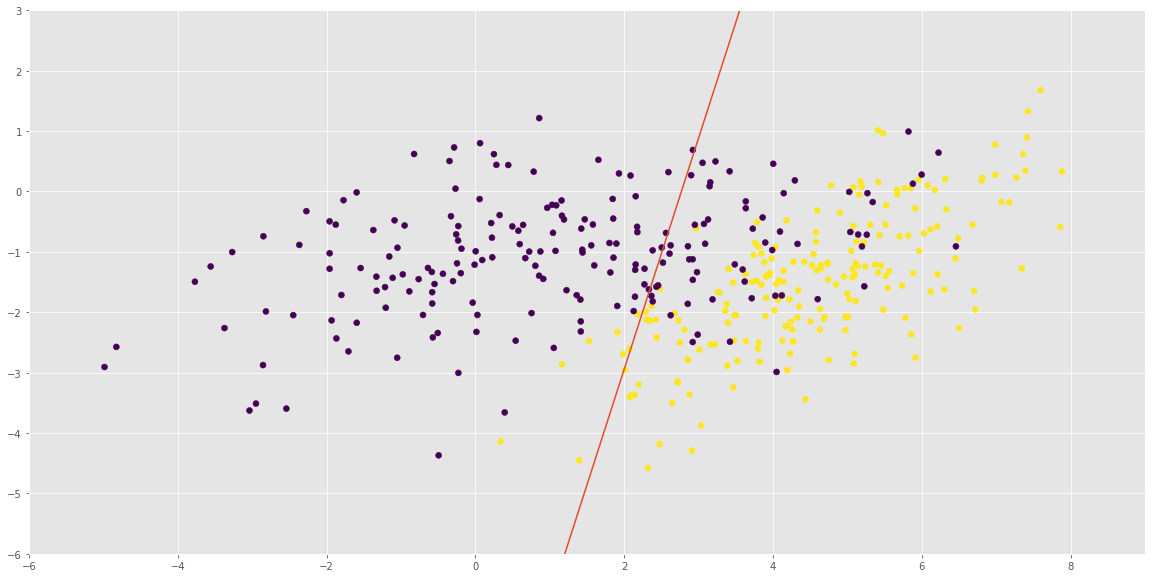

In [7]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

# X[:, 0].min(), X[:, 0].max()
# X[:, 1].min(), X[:, 1].max()

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.scatter(X[:,0], X[:,1], c=y)

clf = MySGDClassifier(batch_generator, model_type='log_reg')
clf.fit(X, y)
x_, y_ = plot_decision_boundary(clf)

ax.plot(x_, y_)
ax.set_xlim(-6., 9.)
ax.set_ylim(-6., 3.)
plt.show()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [8]:
from sklearn.datasets import make_classification

In [9]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [12]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

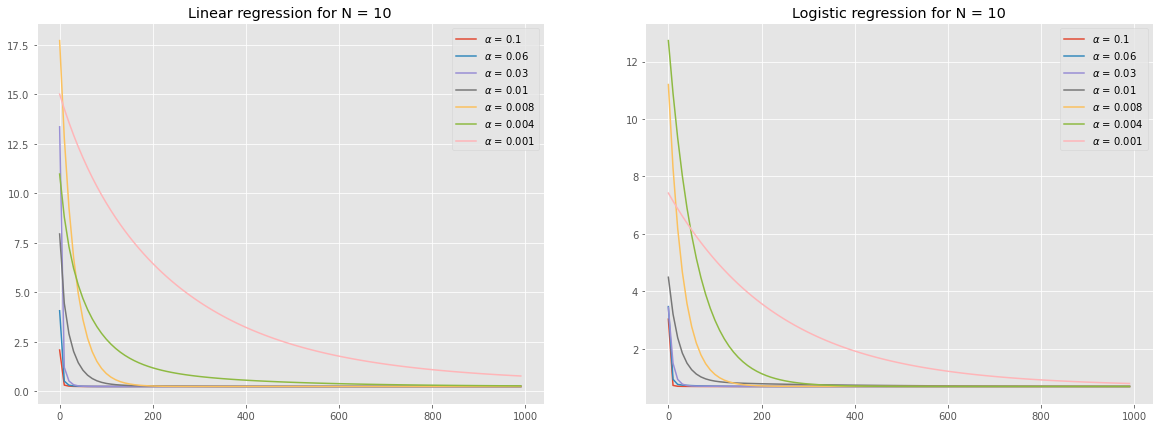

In [13]:
alphas = [0.1, 0.06, 0.03, 0.01, 0.008, 0.004, 0.001]
N = 10
batch = X.shape[0]

fig, ax = plt.subplots(1, 2, figsize=(20, 7))
ax[0].set_title('Linear regression for N = {}'.format(N))
ax[1].set_title('Logistic regression for N = {}'.format(N))
    
batch = X.shape[0]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

for alpha in alphas:
    clf1 = MySGDClassifier(batch_generator, batch_size=batch, max_epoch=1000,
                           alpha=alpha, model_type='lin_reg')
    clf2 = MySGDClassifier(batch_generator, batch_size=batch, max_epoch=1000,
                           alpha=alpha, model_type='log_reg')
    clf1.fit(X, y)
    clf2.fit(X, y)
    
    loss1 = np.array([np.mean(clf1.errors_log['loss'][j * N:(j + 1) * N])
                      for j in range(100)])
    loss2 = np.array([np.mean(clf2.errors_log['loss'][j * N:(j + 1) * N])
                      for j in range(100)])
    ax[0].plot(np.arange(0, 1000, 10), loss1,
               label=r'$\alpha$ = {}'.format(alpha))
    ax[1].plot(np.arange(0, 1000, 10), loss2,
               label=r'$\alpha$ = {}'.format(alpha))

ax[0].legend(loc='upper right')    
ax[1].legend(loc='upper right')    

plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

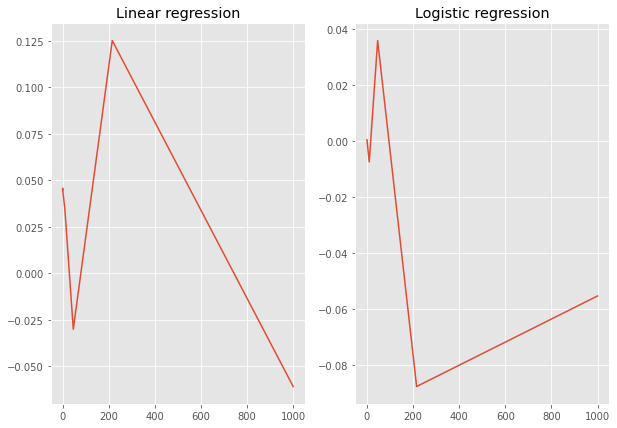

In [152]:
C = np.logspace(3, - 3, 10)
batch = 1000

fig, ax = plt.subplots(1, 2, figsize=(10, 7))
ax[0].set_title('Linear regression')
ax[1].set_title('Logistic regression')

w1 = []
w2 = []
for i in C:
    clf1 = MySGDClassifier(batch_generator, model_type="lin_reg", C=i,
                           batch_size=batch, alpha=0.07)
    clf2 = MySGDClassifier(batch_generator, model_type="log_reg", C=i,
                           batch_size=batch, alpha=0.07)
    clf1.fit(X, y)
    clf2.fit(X, y)
    w1.append(np.mean(clf1.weights))
    w2.append(np.mean(clf2.weights))

ax[0].plot(C, w1)
ax[1].plot(C, w2)

plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [19]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [20]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [21]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from itertools import product
from sklearn.model_selection import train_test_split

Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
batches = [2 ** i for i in range(14)]
scores = []

In [ ]:
for batch in batches:
    clf = MySGDClassifier(batch_generator, batch_size=batch,
                          model_type='lin_reg')
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_train_scaled,
                                                    y_train, test_size=0.25)
    clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    scores.append(roc_auc_score(ytest, ypred))

In [ ]:
batches[np.argmax(scores)]

64

In [ ]:
scores[np.argmax(scores)]

0.8061171195271399

In [ ]:
for batch in batches:
    clf = MySGDClassifier(batch_generator, batch_size=batch,
                          model_type='log_reg')
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_train_scaled,
                                                    y_train, test_size=0.25)
    clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    scores.append(roc_auc_score(ytest, ypred))

In [ ]:
batches[np.argmax(scores)]

16

In [ ]:
scores[np.argmax(scores)]

0.8165021939434308

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [ ]:
grid_params = product(
    (1, 2, 3, 4, 5, 6, 7, 8, 9), # C
    (0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02), # alpha
    (60, 70, 80, 90)) # max_epoch

In [ ]:
scores = []
models = []

In [ ]:
for C, alpha, max_epoch in grid_params:
    models.append(['lin_reg', C, alpha, max_epoch, 64])
    clf = MySGDClassifier(batch_generator, batch_size=64, model_type='lin_reg',
                          max_epoch=max_epoch, C=C, alpha=alpha)
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_train_scaled,
                                                    y_train, test_size=0.25)
    clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    scores.append(roc_auc_score(ytest, ypred))

In [ ]:
models[np.argmax(scores)]

['lin_reg', 3, 0.02, 80, 64]

In [ ]:
scores[np.argmax(scores)]

0.8295027690689445

In [ ]:
grid_params = product(
    (1000, 100, 10, 1), # C
    (0.1, 0.01, 0.001, 0.0001), # alpha
    (1, 10, 20, 50, 100)) # max_epoch

In [ ]:
for C, alpha, max_epoch in grid_params:
    models.append(['log_reg', C, alpha, max_epoch, 16])
    clf = MySGDClassifier(batch_generator, batch_size=16, model_type='log_reg',
                          max_epoch=max_epoch, C=C, alpha=alpha)
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_train_scaled,
                                                    y_train, test_size=0.25)
    clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    scores.append(roc_auc_score(ytest, ypred))

In [ ]:
models[np.argmax(scores)]

['log_reg', 100, 0.005, 100, 16]

In [ ]:
scores[np.argmax(scores)]

0.8204277668359767

**тут чисто для кегли**

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[0.18181818, 0.21052632, 0.15789474, ..., 0.22222222, 0.11111111,
        0.11111111],
       [0.36363636, 0.36842105, 0.36842105, ..., 0.22222222, 0.22222222,
        0.22222222],
       [0.09090909, 0.10526316, 0.10526316, ..., 0.11111111, 0.11111111,
        0.11111111],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27272727, 0.10526316, 0.05263158, ..., 0.11111111, 0.11111111,
        0.11111111],
       [0.13636364, 0.10526316, 0.10526316, ..., 0.11111111, 0.11111111,
        0.11111111]])

In [105]:
grid_params = product(
    (9, 10, 14, 15, 16, 17, 18, 30, 31, 33, 34, 62, 63, 64, 65, 66), # batch
    (1, 3, 10, 100), # C
    (0.02, 0.005, 0.01, 0.1, 0.001), # alpha
    (10, 20, 80, 100)) # max_epoch

In [103]:
scores = []
models = []

In [92]:
for batch, C, alpha, max_epoch in grid_params:
    clf = MySGDClassifier(batch_generator, batch_size=batch,
                          model_type='lin_reg', max_epoch=max_epoch, C=C,
                          alpha=alpha)
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_train_scaled, y_train)
    clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    score = 0
    border = None
    for th in np.arange(0.0, 1.0, 0.01):
      s = f1_score(ytest, ypred > th)
      if s > score:
        score = s
        border = th
    models.append(['lin_reg', C, alpha, max_epoch, batch, border]) 
    scores.append(score)

In [99]:
ind = np.argpartition(np.asarray(scores), -10)[-10:]

In [100]:
np.asarray(scores)[ind]

array([0.64364207, 0.64386536, 0.64539007, 0.64627528, 0.65010142,
       0.65034593, 0.65146865, 0.65955176, 0.65260938, 0.6507177 ])

In [101]:
np.asarray(models)[ind]

array([['lin_reg', '1', '0.001', '20', '15', '0.29'],
       ['lin_reg', '100', '0.1', '100', '10', '0.26'],
       ['lin_reg', '100', '0.1', '10', '66', '0.32'],
       ['lin_reg', '100', '0.1', '10', '16', '0.34'],
       ['lin_reg', '3', '0.01', '20', '63', '0.29'],
       ['lin_reg', '100', '0.02', '10', '66', '0.3'],
       ['lin_reg', '3', '0.1', '100', '18', '0.25'],
       ['lin_reg', '10', '0.02', '20', '30', '0.3'],
       ['lin_reg', '10', '0.001', '80', '34', '0.3'],
       ['lin_reg', '10', '0.005', '20', '30', '0.3']], dtype='<U19')

In [106]:
for batch, C, alpha, max_epoch in grid_params:
    clf = MySGDClassifier(batch_generator, batch_size=batch,
                          model_type='log_reg', max_epoch=max_epoch, C=C,
                          alpha=alpha)
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_train_scaled, y_train)
    clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    score = 0
    border = None
    for th in np.arange(0.0, 1.0, 0.01):
      s = f1_score(ytest, ypred > th)
      if s > score:
        score = s
        border = th
    models.append(['log_reg', C, alpha, max_epoch, batch, border]) 
    scores.append(score)

In [107]:
ind = np.argpartition(np.asarray(scores), -10)[-10:]
np.asarray(scores)[ind]

array([0.64079823, 0.64205128, 0.64308342, 0.64329897, 0.64403067,
       0.64468448, 0.64471058, 0.64560295, 0.64683613, 0.64932362])

In [108]:
np.asarray(models)[ind]

array([['log_reg', '10', '0.1', '80', '14', '0.33'],
       ['log_reg', '10', '0.1', '20', '15', '0.29'],
       ['log_reg', '10', '0.01', '20', '17', '0.29'],
       ['log_reg', '10', '0.1', '20', '9', '0.29'],
       ['log_reg', '100', '0.01', '100', '18', '0.3'],
       ['log_reg', '100', '0.01', '10', '15', '0.31'],
       ['log_reg', '10', '0.005', '20', '15', '0.28'],
       ['log_reg', '10', '0.1', '80', '10', '0.29'],
       ['log_reg', '10', '0.01', '100', '15', '0.29'],
       ['log_reg', '1', '0.1', '20', '31', '0.28']], dtype='<U19')

['log_reg', '100', '0.01', '10', '15', '0.31']  -> 0.61483
['log_reg', '100', '0.01', '100', '18', '0.3'] ->  0.61576

**конец**

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [ ]:
scores = []
thresholds = np.arange(0.0, 1.0, 0.01)

In [ ]:
for threshold in thresholds:
    clf = MySGDClassifier(batch_generator, batch_size=64, model_type='lin_reg',
                          max_epoch=80, C=3, alpha=0.02)
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_train_scaled,
                                                    y_train, test_size=0.25)
    clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    scores.append(f1_score(ytest, ypred >= threshold))

In [ ]:
thresholds[np.argmax(scores)]

0.32

In [ ]:
for threshold in thresholds:
    clf = MySGDClassifier(batch_generator, batch_size=16, model_type='log_reg',
                          max_epoch=100, C=100, alpha=0.005)
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_train_scaled,
                                                    y_train, test_size=0.25)
    clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    scores.append(f1_score(ytest, ypred >= threshold))

In [ ]:
thresholds[np.argmax(scores)]

0.28

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [ ]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [ ]:
y_test = []
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [ ]:
X_test_scaled = scaler.fit_transform(X_test)

**0.61**

In [ ]:
clf2 = MySGDClassifier(batch_generator, batch_size=16, model_type='log_reg',
                          max_epoch=100, C=100, alpha=0.005)
clf2.fit(X_train_scaled, y_train)

MySGDClassifier(C=100, alpha=0.005,
                batch_generator=<function batch_generator at 0x7f139dff9820>,
                batch_size=16, max_epoch=100, model_type='log_reg')

In [ ]:
pred2 = np.array(clf2.predict(X_test_scaled) >= 0.28, dtype=int)

In [ ]:
test_data["target"] = pd.Series(pred2)
with open("res2.csv", "w") as f:
    f.write(test_data.to_csv(columns=("pair_id", "target"), index=False))

**0.60958**

In [ ]:
clf1 = MySGDClassifier(batch_generator, batch_size=64, model_type='lin_reg',
                          max_epoch=80, C=3, alpha=0.02)
clf1.fit(X_train_scaled, y_train)
pred1 = np.array(clf1.predict(X_test_scaled) >= 0.32, dtype=int)
test_data["target"] = pd.Series(pred1)
with open("res1.csv", "w") as f:
    f.write(test_data.to_csv(columns=("pair_id", "target"), index=False))

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***